In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os
import pickle as pkl
from pprint import pprint

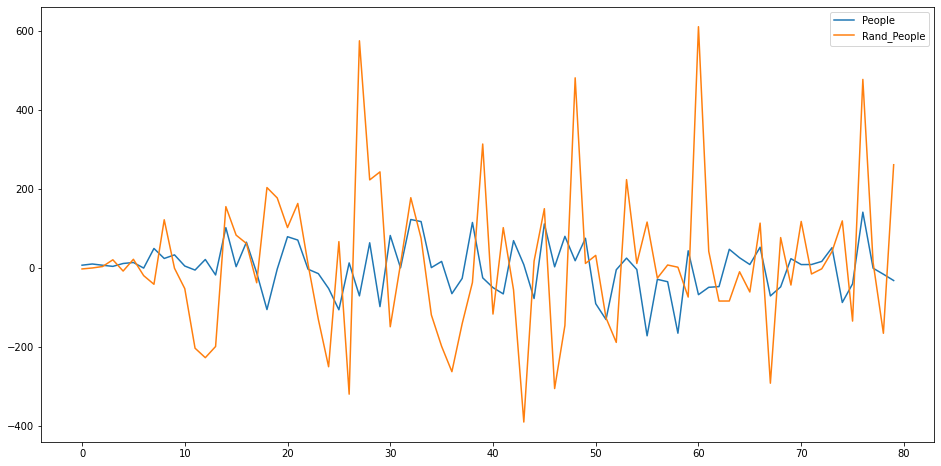

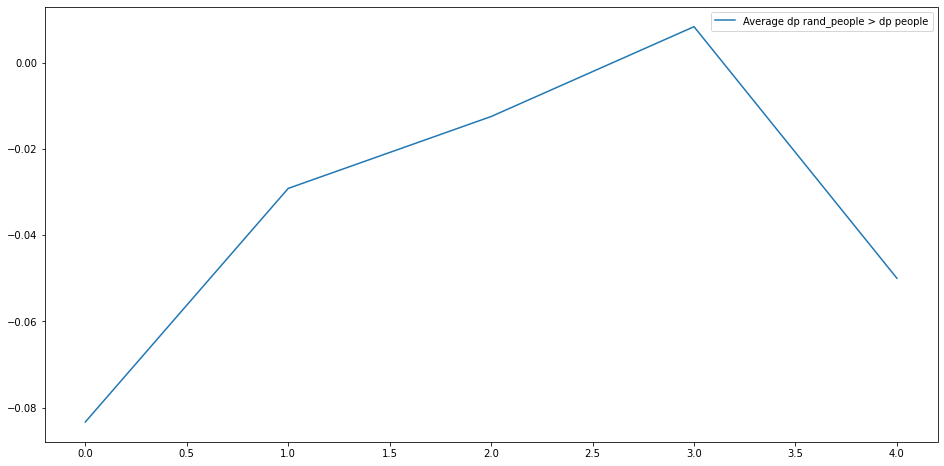

In [39]:
dp_stats = pkl.load(open('dp_stats1.pkl', 'rb'))
ppl = np.array(dp_stats['people'])
ppl = np.reshape(ppl, (-1, 12))
ppl = ppl.mean(axis=-1)
r_ppl = np.array(dp_stats['rand_people'])
r_ppl = np.reshape(r_ppl, (-1, 12))
r_ppl = r_ppl.mean(axis=-1)

start = 20
fig, _ = plt.subplots(figsize=(16, 8))
plt.plot(range(len(ppl[start:])), ppl[start:], label='People')
plt.plot(range(len(ppl[start:])), r_ppl[start:], label='Rand_People')
plt.legend()
plt.savefig('dp_good.png')
plt.show()
plt.close()


fig, _ = plt.subplots(figsize=(16, 8))
ppl = np.array(dp_stats['people'])
r_ppl = np.array(dp_stats['rand_people'])
r_bigger = (r_ppl > ppl)*1.0
r_bigger = np.reshape(r_bigger, (-1, 120 * 2))
r_bigger = r_bigger.mean(axis=-1) - 0.5
plt.plot(range(len(r_bigger)), r_bigger, label='Average dp rand_people > dp people')
plt.legend()
plt.savefig('dp_comp_good.png')
plt.show()
plt.close()

# print(dp_stats)


In [36]:
def print_results(fnames, min_=-1):
    for fname in fnames:
        results = pkl.load(open(fname, 'rb'))
        res_dict = {}
        for k, v in results.items():
            if np.mean(v) < min_:
                res_dict = {}
                break
            if 'people' in k and len(v) > 1:
                res_dict[k] = np.mean(v), np.std(v)
        new_fname = '/'.join(fname.split('/')[2:-1])
        if len(res_dict) > 0:
            print(new_fname)
            pprint(res_dict)

In [43]:
ntasks = 4

In [44]:
reg_pretrain = glob('m4m_cache/reg_pretrain_results/*ntasks={}*/results.pkl'.format(ntasks))
print_results(reg_pretrain)
print('\n', '-'*40)
tgt_only = glob('m4m_cache/tgtonly_results/*/results.pkl')
print_results(tgt_only)
print('\n', '-'*40)

phase_in = glob('m4m_cache/phase-in_results/*ntasks={}*/results.pkl'.format(ntasks))
print_results(phase_in, min_=0.37)
print('\n', '-'*40)

regular-pretrain-ntasks=4-lr.1e-3
{'people': (0.36239316239316244, 0.010743423153826105)}
regular-pretrain-ntasks=4-lr.5e-3
{'people': (0.3495726495726496, 0.013459842519678314)}
regular-pretrain-ntasks=4-lr.5e-4
{'people': (0.3598290598290598, 0.00792616965426983)}

 ----------------------------------------
tgtonly.batchsz.128.lr.1e-3
{'people': (0.3786324786324786, 0.01053745983413501)}
tgtonly.batchsz.128.lr.3e-4
{'people': (0.3598290598290598, 0.009440479501869466)}

 ----------------------------------------
phase-in-20_ntasks=4-lr.5e-4
{'people': (0.37264957264957266, 0.004358136336404099),
 'pre_ft.people': (0.37216117216117217, 0.013705704713457657)}
phase-in-20_ntasks=4-lr.1e-3
{'people': (0.38461538461538464, 0.02124752631565137),
 'pre_ft.people': (0.3824175824175824, 0.014688599015211315)}

 ----------------------------------------


In [45]:
moe_pretrain = glob('m4m_cache/MoE_results/*ntasks={}*/results.pkl'.format(ntasks))
print_results(moe_pretrain, min_=0.37)
print('\n', '-'*40)

sm_pretrain = glob('m4m_cache/softmax_results/*ntasks={}*/results.pkl'.format(ntasks))
print_results(sm_pretrain, min_=0.37)
print('\n', '-'*40)

MoE.meta.val.w_lr=1e-2_sgd_lr=1e-3_lr=1e-3_ntasks=4.rand
{'people': (0.3803418803418803, 0.019452660985882123),
 'pre_ft.people': (0.3750915750915751, 0.024231260671855284)}
MoE.meta.val.w_lr=1e-3_sgd_lr=1e-1_lr=1e-3_ntasks=4.rand
{'people': (0.3803418803418803, 0.013939749085726573),
 'pre_ft.people': (0.3853479853479853, 0.02539917336756004)}
MoE.meta.val.w_lr=1e-3_sgd_lr=1e-2_lr=1e-3_ntasks=4.rand
{'people': (0.39487179487179486, 0.007252377242938949),
 'pre_ft.people': (0.38168498168498166, 0.021558884937087408)}
MoE.meta.val.w_lr=1e-3_sgd_lr=1e-3_lr=1e-3_ntasks=4.rand
{'people': (0.3829059829059829, 0.008716272672808174),
 'pre_ft.people': (0.38168498168498166, 0.021558884937087408)}
MoE.meta.val.w_lr=1e-2_sgd_lr=1e-1_lr=1e-3_ntasks=4.rand
{'people': (0.37777777777777777, 0.006729921259839157),
 'pre_ft.people': (0.3846153846153846, 0.0017944979800609527)}

 ----------------------------------------
softmax.meta.val.w_lr=1e-3_sgd_lr=1e-2_lr=1e-3_ntasks=4.rand
{'people': (0.37692307

In [46]:
moe_pretrain = glob('m4m_cache/warmUD_results/*ntasks={}*/results.pkl'.format(ntasks))
print_results(moe_pretrain, min_=0.37)
print('\n', '-'*40)

sm_pretrain = glob('m4m_cache/alt_results/*ntasks={}*/results.pkl'.format(ntasks))
print_results(sm_pretrain, min_=0.37)
print('\n', '-'*40)

sm_pretrain = glob('m4m_cache/default_results/*ntasks={}*/results.pkl'.format(ntasks))
print_results(sm_pretrain, min_=0.37)
print('\n', '-'*40)

warmUD_freq_5_ntasks=4-lr.5e-4
{'people': (0.3735042735042735, 0.012267265037954975),
 'pre_ft.people': (0.3772893772893773, 0.01139659281033262)}
warmUD_freq_10_ntasks=4-lr.5e-4
{'people': (0.37606837606837606, 0.017805697996580886),
 'pre_ft.people': (0.38168498168498166, 0.012981718056168028)}
warmUD_freq_2_ntasks=4-lr.1e-3
{'people': (0.4068376068376069, 0.006729921259839157),
 'pre_ft.people': (0.38681318681318677, 0.008972489900304673)}
warmUD_freq_5_ntasks=4-lr.1e-3
{'people': (0.37264957264957266, 0.007352414758156086),
 'pre_ft.people': (0.3824175824175824, 0.009495590766897957)}

 ----------------------------------------
alt_5_ntasks=4-lr.5e-4
{'people': (0.37264957264957266, 0.005268729917067503),
 'pre_ft.people': (0.38388278388278385, 0.010360538918484203)}
alt_5_ntasks=4-lr.1e-3
{'people': (0.382051282051282, 0.01509702712192796),
 'pre_ft.people': (0.3912087912087912, 0.014355983840487484)}

 ----------------------------------------
default_ntasks=4-lr.1e-3
{'people': (0

In [82]:
def process_str(fname, og_name, type_='default'):
    basename = os.path.basename(fname)
    splits_ = basename.split('.')
    if len(splits_) == 3:
        lr = float(splits_[1])
    else:
        lr = 3e-4
    ntasks = int(splits_[0].split('=')[-1].split('-')[0])
    if 'default' in fname:
        alt_freq = 'N/A'
    else:
        alt_freq = int(splits_[0].split('_')[1])
    desc = {'AltFreq': alt_freq, 'Ntasks':ntasks, 'LR':lr, 'OptType': type_}
    pkl_loc = os.path.join('m4m_cache', '.'.join(os.path.basename(og_name).split('.')[:-1]), 'results.pkl')
    data = pkl.load(open(pkl_loc, 'rb'))
    for k, v in data.items():
        stats = np.mean(v), np.std(v)
        if 'people' in k:
            desc['{}.mean'.format(k)] = stats[0]
            desc['{}.std'.format(k)] = stats[1]
    desc = {k: str(v) for k, v in desc.items()}
    return desc

In [83]:
alt_files = glob('run_logs/fldr_alt/*')
alt_results = [process_str(x, x, type_='ALT') for x in alt_files]

In [84]:
warm_files = glob('run_logs/fldr_warmup/*')
warmup_results = [process_str(x.replace('warmUD_freq', 'warmUDfreq'), x, type_='WarmUpDown') for x in warm_files]

In [85]:
default_files = glob('run_logs/fldr_default/*')
default_results = [process_str(x, x) for x in default_files]


In [87]:
def process_meta(fname, og_name):
    pieces = os.path.basename(fname).split('.')
    type_ = pieces[0]
    rand_ = 'rand' in fname
    rest = pieces[3]
    pieces = rest.split('_')
    if len(pieces) == 2:
        lr = 3e-4
        ntasks = 4
    else:
        lr = 1e-3
        ntasks = 10 if len(pieces) == 4 else 4
    desc = {'LR':lr, 'Ntasks':ntasks, 'RandInit': rand_, 'OptType': type_}
    desc[pieces[0].split('=')[0]] = pieces[0].split('=')[-1]
    desc[pieces[1].split('=')[0]] = pieces[1].split('=')[-1]
    pkl_loc = os.path.join('m4m_cache', '.'.join(os.path.basename(og_name).split('.')[:-1]), 'results.pkl')
    data = pkl.load(open(pkl_loc, 'rb'))
    for k, v in data.items():
        stats = np.mean(v), np.std(v)
        if 'people' in k:
            desc['{}.mean'.format(k)] = stats[0]
            desc['{}.std'.format(k)] = stats[1]
    desc = {k: str(v) for k, v in desc.items()}
    return desc

In [88]:
sm_meta = glob('run_logs/fldr_meta/softmax*')
sm_meta_mod = [x.replace('w_lr', 'weightLR') for x in sm_meta]
sm_meta_mod = [x.replace('sgd_lr', 'sgdLR') for x in sm_meta_mod]
sm_results = [process_meta(sm_meta_mod[i], sm_meta[i]) for i in range(len(sm_meta))]

In [89]:
moe_meta = glob('run_logs/fldr_meta/MoE*')
moe_meta_mod = [x.replace('w_lr', 'weightLR') for x in moe_meta]
moe_meta_mod = [x.replace('sgd_lr', 'sgdLR') for x in moe_meta_mod]
moe_results = [process_meta(moe_meta_mod[i], moe_meta[i]) for i in range(len(moe_meta))]

In [90]:
all_keys = set([*list(warmup_results[0].keys()), *list(moe_results[0].keys())])

In [76]:
def write_csv(keys, arr, out_handle):
    for dict_ in arr:
        result_ = []
        for key in keys:
            if key in dict_:
                result_.append(str(dict_[key]))
            else:
                result_.append('N/A')
        str_ = ','.join(result_)
        out_handle.write('{}\n'.format(str_))            

In [91]:
all_data = [*alt_results, *warmup_results, *default_results, *moe_results, *sm_results]
with open('Results.csv', 'w') as handle_:
    # default
    head = ','.join(all_keys)
    handle_.write("{}\n".format(head))
    write_csv(all_keys, all_data, handle_)    

In [92]:
def grp_by_key(data, key, value):
    results = []
    for entry in data:
        if entry[key] == value:
            results.append(entry)
    return results

def select_max(data, key):
    max_val = -1
    result_ = None
    for entry in data:
        if float(entry[key])  > max_val:
            result_ = entry
            max_val = float(entry[key])
    return result_

In [104]:
grp_tasks = grp_by_key(all_data, 'Ntasks', '4')
default_ = grp_by_key(grp_tasks, 'OptType', 'default')
print(default_[0])
warmupdown = grp_by_key(grp_tasks, 'OptType', 'WarmUpDown')
alt = grp_by_key(grp_tasks, 'OptType', 'ALT')
moe = grp_by_key(grp_tasks, 'OptType', 'MoE')
sm = grp_by_key(grp_tasks, 'OptType', 'softmax')


{'AltFreq': 'N/A', 'Ntasks': '4', 'LR': '0.0003', 'OptType': 'default', 'pre_ft.people.mean': '0.37875457875457874', 'pre_ft.people.std': '0.017612916161423152', 'people.mean': '0.35312499999999997', 'people.std': '0.013501543121683045'}
6 15


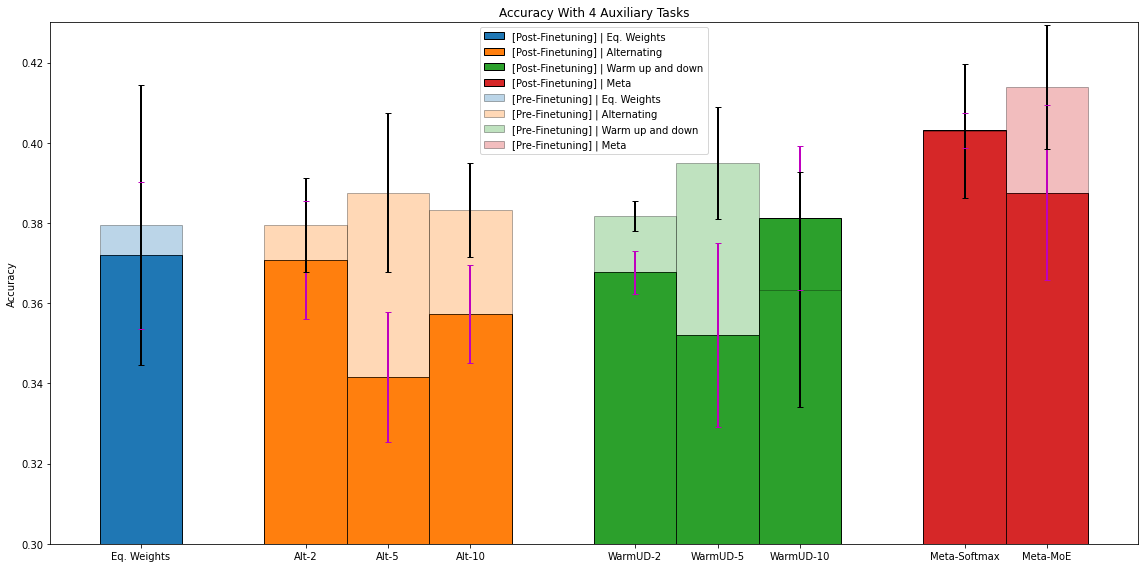

In [3]:
def plot_results(perfs, err, desc, alpha=1.0, ntasks=4, ylim=(0.3, 0.43)):
    labels = ['Eq. Weights', 'Alt-2', 'Alt-5','Alt-10', 'WarmUD-2', 'WarmUD-5', 'WarmUD-10', 'Meta-Softmax', 'Meta-MoE',]
    width = 0.5
    x = [0.5,  2-width, 2, 2+width, 4-width, 4, 4+width, 5.75-(width/2), 5.75+(width/2)]

    e_color = 'k' if alpha < 1.0 else 'm'
    ax.bar([x[0]], [perfs[0]], width, yerr=[err[0]], error_kw=dict(ecolor=e_color, lw=2, capsize=3, capthick=1), alpha=alpha, edgecolor='k', color='tab:blue', label='[{}] | Eq. Weights'.format(desc))
    ax.bar(x[1:4], perfs[1:4], width, yerr=err[1:4], error_kw=dict(ecolor=e_color, lw=2, capsize=3, capthick=1), alpha=alpha, edgecolor='k', color='tab:orange', label='[{}] | Alternating'.format(desc))
    ax.bar(x[4:7], perfs[4:7], width, yerr=err[4:7], error_kw=dict(ecolor=e_color, lw=2, capsize=3, capthick=1), alpha=alpha, edgecolor='k', color='tab:green', label='[{}] | Warm up and down'.format(desc))
    ax.bar(x[7:], perfs[7:], width, yerr=err[7:], error_kw=dict(ecolor=e_color, lw=2, capsize=3, capthick=1), alpha=alpha, edgecolor='k', color='tab:red', label='[{}] | Meta'.format(desc))


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy With {} Auxiliary Tasks'.format(ntasks))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(ylim)
    ax.legend()

    fig.tight_layout()

    # plt.savefig('perf_under_training.png')
#     plt.show()

fig, ax = plt.subplots(figsize=(16, 8))
perfs = [0.3719, 0.3708, 0.3417, 0.3573, 0.3677, 0.3521, 0.3813, 0.4031, 0.3875]
err = [0.0184, 0.0147, 0.0162, 0.0121, 0.0053, 0.0229, 0.0179, 0.0044, 0.0218]
plot_results(perfs, err, 'Post-Finetuning', alpha=1.0)

perfs = [0.3795, 0.3795, 0.3875, 0.3832, 0.3817, 0.3949, 0.3634, 0.4029, 0.4139 ]
err = [0.0350, 0.0117, 0.0198, 0.0117, 0.0037, 0.0139, 0.0292, 0.0167, 0.0155]
plot_results(perfs, err, 'Pre-Finetuning', alpha=0.3)

plt.savefig('perfs_ntasks=5.png')
plt.show()
plt.close()

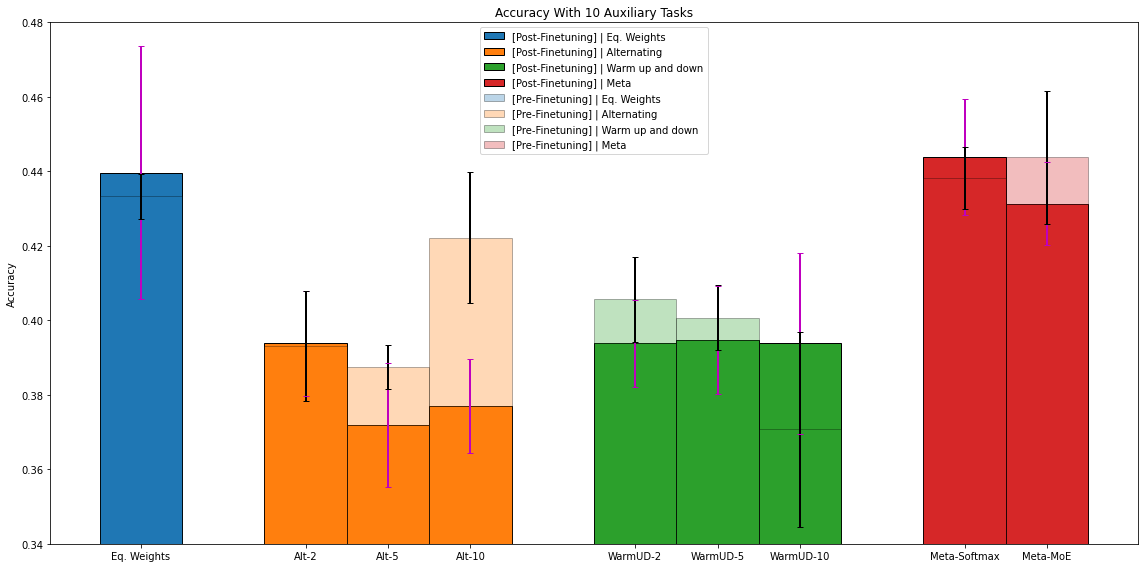

In [4]:
fig, ax = plt.subplots(figsize=(16, 8))
perfs = [0.4396, 0.3938, 0.3719, 0.3771, 0.3938, 0.3948, 0.3938, 0.4438, 0.4313 ]
err = [0.0340, 0.0142, 0.0167, 0.0126, 0.0117, 0.0145, 0.0243, 0.0155, 0.0111]

plot_results(perfs, err, 'Post-Finetuning', alpha=1.0, ntasks=10)

perfs = [0.4333, 0.3931, 0.3875, 0.4222, 0.4056, 0.4007, 0.3708, 0.4382, 0.4438]
err = [0.0061, 0.0147, 0.0059, 0.0175, 0.0113, 0.0087, 0.0262, 0.0084, 0.0179]

plot_results(perfs, err, 'Pre-Finetuning', alpha=0.3, ntasks=10, ylim=(0.34, 0.48))

plt.savefig('perfs_ntasks=10.png')
plt.show()
plt.close()

[0.5, 1, 1.5] [0.986, 0.99, 0.991]
[2.5, 3, 3.5] [0.942, 0.74, 0.856]
[0.5, 1, 1.5] [0.85, 0.856, 0.855]
[2.5, 3, 3.5] [0.941, 0.732, 0.823]


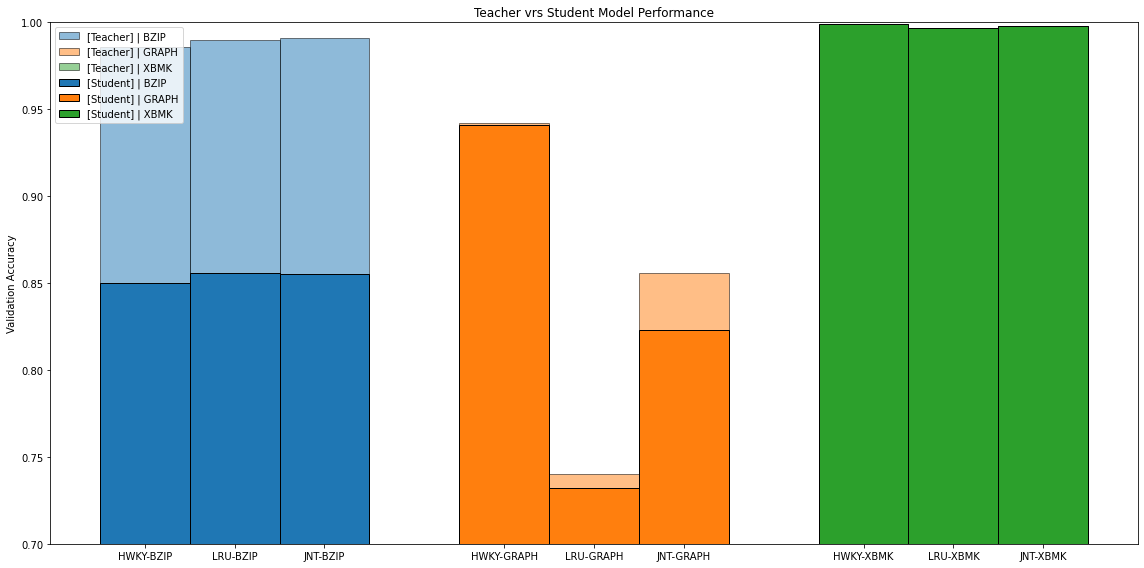

In [14]:
def plot_results_comparch(perfs, desc, alpha=1.0, ylim=(0.7, 1.0)):
    labels = ['HWKY-BZIP', 'LRU-BZIP', 'JNT-BZIP', 'HWKY-GRAPH', 'LRU-GRAPH', 'JNT-GRAPH', 'HWKY-XBMK', 'LRU-XBMK', 'JNT-XBMK',]

    width = 0.5
    x = [1-width, 1, 1+width, 3-width, 3, 3+width, 5-width, 5, 5+width]

    e_color = 'k' if alpha < 1.0 else 'm'
    print(x[0:3], perfs[0:3])
    print(x[3:6], perfs[3:6])
    ax.bar(x[0:3], perfs[0:3], width, error_kw=dict(ecolor=e_color, lw=2, capsize=3, capthick=1), alpha=alpha, edgecolor='k', color='tab:blue', label='[{}] | BZIP'.format(desc))
    ax.bar(x[3:6], perfs[3:6], width, error_kw=dict(ecolor=e_color, lw=2, capsize=3, capthick=1), alpha=alpha, edgecolor='k', color='tab:orange', label='[{}] | GRAPH'.format(desc))
    ax.bar(x[6:], perfs[6:], width, error_kw=dict(ecolor=e_color, lw=2, capsize=3, capthick=1), alpha=alpha, edgecolor='k', color='tab:green', label='[{}] | XBMK'.format(desc))


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Validation Accuracy')
    ax.set_title('Teacher vrs Student Model Performance')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(ylim)
    ax.legend()

    fig.tight_layout()

fig, ax = plt.subplots(figsize=(16, 8))
perfs_t = [0.986, 0.990, 0.991, 0.942, 0.740, 0.856, 0.999, 0.997, 0.998]
plot_results_comparch(perfs_t, 'Teacher', alpha=0.5)


perfs_s = [0.850, 0.856, 0.855, 0.941, 0.732, 0.823, 0.999, 0.997, 0.998]
plot_results_comparch(perfs_s, 'Student', alpha=1.0)

plt.savefig('kd.png')
plt.show()
plt.close()

# Stuff for presentation

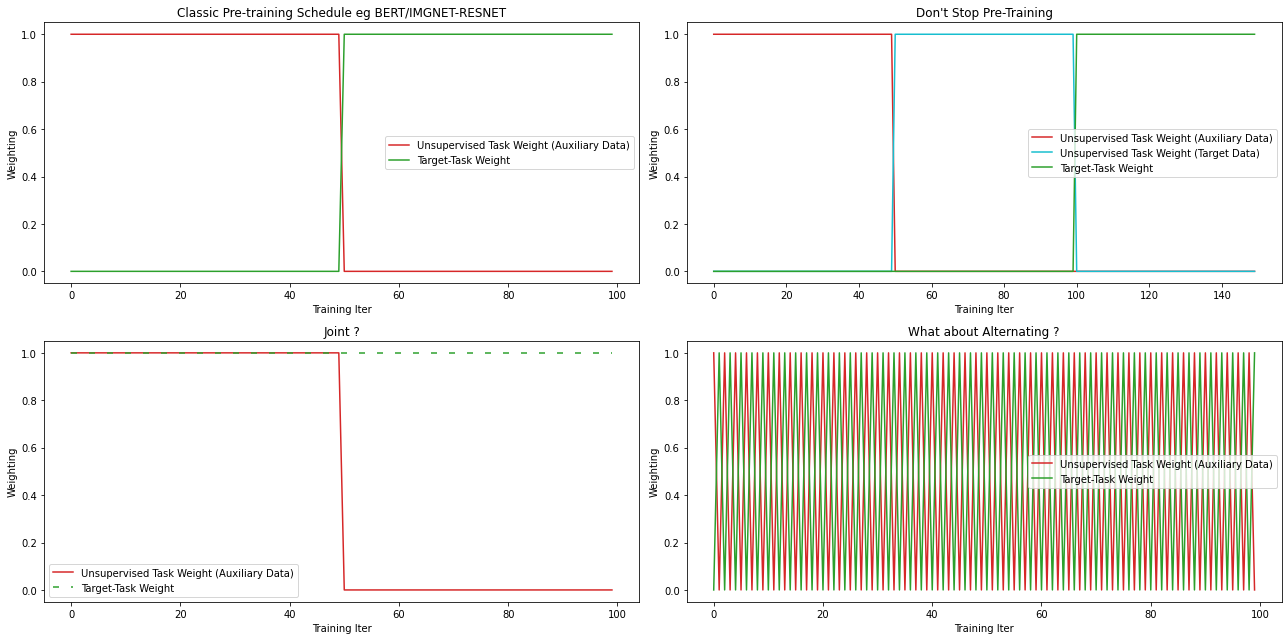

In [29]:

classical_aux = np.zeros(100)
classical_aux[:50] = 1

classical_prim = np.zeros(100)
classical_prim[50:] = 1

fig, ax = plt.subplots(2, 2, figsize=(18, 9))
ax[0][0].set_title('Classic Pre-training Schedule eg BERT/IMGNET-RESNET')
ax[0][0].plot(range(100), classical_aux, color='tab:red', label='Unsupervised Task Weight (Auxiliary Data)')
ax[0][0].plot(range(100), classical_prim, color='tab:green', label='Target-Task Weight')
ax[0][0].legend()
ax[0][0].set_ylabel('Weighting')
ax[0][0].set_xlabel('Training Iter')


dsp_aux = np.zeros(150)
dsp_aux[:50] = 1

dsp_unsup_prim = np.zeros(150)
dsp_unsup_prim[50:100] = 1

dsp_prim = np.zeros(150)
dsp_prim[100:] = 1

ax[0][1].set_title("Don't Stop Pre-Training")
ax[0][1].plot(range(150), dsp_aux, color='tab:red', label='Unsupervised Task Weight (Auxiliary Data)')
ax[0][1].plot(range(150), dsp_unsup_prim, color='tab:cyan', label='Unsupervised Task Weight (Target Data)')
ax[0][1].plot(range(150), dsp_prim, color='tab:green', label='Target-Task Weight')
ax[0][1].legend()
ax[0][1].set_ylabel('Weighting')
ax[0][1].set_xlabel('Training Iter')




alt_aux = np.zeros(100)
alt_aux[::2] = 1

alt_prim = np.zeros(100)
alt_prim[1::2] = 1


ax[1][1].set_title("What about Alternating ?")
ax[1][1].plot(range(len(alt_aux)), alt_aux, color='tab:red', label='Unsupervised Task Weight (Auxiliary Data)')
ax[1][1].plot(range(len(alt_prim)), alt_prim, color='tab:green', label='Target-Task Weight')
ax[1][1].legend()
ax[1][1].set_ylabel('Weighting')
ax[1][1].set_xlabel('Training Iter')


aux = np.zeros(100)
aux[:50] = 1

ax[1][0].set_title("Joint ?")
ax[1][0].plot(range(len(alt_aux)),  aux, color='tab:red', label='Unsupervised Task Weight (Auxiliary Data)')
ax[1][0].plot(range(len(alt_prim)), [1]*len(alt_aux), linestyle='dashed',dashes=(4, 8), color='tab:green', label='Target-Task Weight')
ax[1][0].legend()
ax[1][0].set_ylabel('Weighting')
ax[1][0].set_xlabel('Training Iter')


plt.tight_layout()
plt.savefig('pre-traing_strategies.png')
plt.show()